Author: Nicole Mazzitelli Narvaz

Date: 10/27/2021

Obj: Cut the original datacube of ESO325 around the central galaxy.
     Cortar o cubo de dados original da ESO325 ao redor da galáxia central.
     
     Due the presence of telluric lines, we apply ZAP (the Zurich Atmosphere Purge) software to improve the sky subtracted. So, the data cube read bellow is a ZAPed date cube.

In [1]:
from mpdaf.obj import Cube
from mpdaf.obj import deg2sexa, sexa2deg
import astropy.units as u
import matplotlib.pyplot as plt

Opening the original data cube.
Abrindo o cubo original de dados.

In [2]:
cube = Cube('/home/nicole/eso325/eso325_cube.fits')

Defining the center around where the cut will be made.

Definindo o centro ao redor de onde será feito o corte.

In [3]:
#center_deg = ['0.6518871','135.7984080'] #Format is (DEC,RA). Units in degree
center_px = [232,276]                    #Direct from Header. Format (y,x) in px value

#center_sex = deg2sexa(center_deg)              #Convert (DEC,RA) to degree/Convertendo (DEC,RA) para graus
#print(center_sex) 

### Making a square cut around the center defined above. ###

**center**: Defines the center for the cut.

**unit_center**: Defines the units of the center. In astropy units. If **None**, the unit is pixel.

**size**: Defines the  length square.

**unit_size**: Defines the units of size. In astropy units. If **None**, the unit is pixel.

**lbda**: Defines the wavelength range for extraction.

**unit_wave**: Defines the units of wavelength. In astropy units.

### Realizando o corte quadrado ao redor do centro definido acima.

**center**: Define o centro para para o corte.

**unit_center**: Define as unidades do centro, em unidades Astropy. Se for **None**, a unidade é pixel.

**size**: Define o comprimento do lado do quadrado.

**unit_size**: Define as unidades para o lado, em unidades Astropy. Se **None**, então a unidade é pixel.

**lbda**: Define o range para extração de comprimento de onda.

**unit_wave**: Define a unidade para o comprimento de onda, em unidades Astropy.

In [10]:
corte = cube.subcube(center=center_px, size=(90,75), unit_center=None, unit_size=None, unit_wave=u.angstrom)

In [11]:
corte.write('/home/nicole/eso325/cutout_eso325cube.fits')#Save the fits file/Save o arquivo .fits

Display informations about the cut and make a image.

Apresentra informações do corte e cria uma imagem.

[INFO] 3682 x 75 x 90 Cube (/home/nicole/eso325/cutout_eso325cube.fits)
[INFO] .data(3682 x 75 x 90) (1e-20 erg / (Angstrom cm2 s)), .var(3682 x 75 x 90)
[INFO] center:(-38:10:35.41692285,13:43:33.29079452) size:(15.000",18.000") step:(0.200",0.200") rot:-0.0 deg frame:FK5
[INFO] wavelength: min:4750.17 max:9351.42 step:1.25 Angstrom
/tmp/ipykernel_5377/80105395.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fmt" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/home/nicole/eso325/cutout_eso325.png', fmt='png') #Save the Image/Sava a image


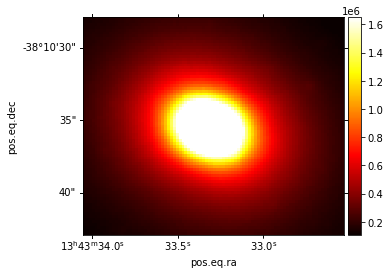

In [12]:
corte.info() #Display information/Apresenta informações
image = corte.sum(axis=0) #Make a image sum along the z axis/Faz uma imagem ao somar ao longo do eixo z
image.plot(use_wcs=True, cmap='hot',zscale=True, colorbar='v') #Plot image/Plota a imagem
plt.savefig('/home/nicole/eso325/cutout_eso325.png', fmt='png') #Save the Image/Sava a image

In [9]:
#Now we need a image with the same wavelength range, but bigger, for compute the PSF
img = cube.subcube(center=center_px, size=50, lbda=(4800,8000), unit_center=None, unit_size=u.arcsec, unit_wave=u.angstrom)